In [3]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import save_model
from matplotlib import pyplot as plt

Определим константы для обучения моделей.

In [4]:
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # количество предсказываемых классов
OPTIMIZER = SGD() # используем SGD в качестве оптимизатора при бэкпропе
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

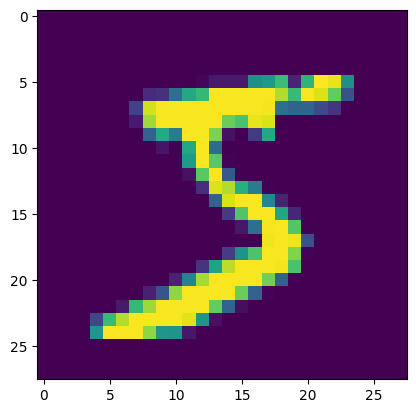

In [8]:
plt.imshow(X_train[0])
plt.show()

In [9]:
X_train[0].shape

(28, 28)

X_train состоит из 60000 строк, в каждой матрица размером 28x28  --> развернем их в 60000 x 784

In [10]:
RESHAPED = 784

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train[0].shape

(784,)

Нормируем

In [15]:
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Рзавернем таргеты в бинарные таблички

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

In [19]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

А вот собственно и модель из 3 строк

In [20]:
RESHAPED

784

In [21]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

Softmax сплющивает k-мерный вектор, содержащий произвольные вещественные числа, в k-мерный вектор вещественных чисел из интервала (0,1). В нашем случае она аггрегирует 10 ответов, выданных предыдущим слоем из  10 нейронов.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 11828

Определенную модель теперь нужно откомпилировать. Перед компиляцией необходимо:
* Выбрать оптимизатор, то есть конкретный алгоритм, который будет обновлять веса в процессе обучения модели
* Выбрать целевую функцию, которую оптимизатор использует для навигации по пространству весов
* Оценить качество обученной модели

categorical_crossentropy - как бинарная, только для нескольких классов

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=20,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 1.4374 - accuracy: 0.6327 - val_loss: 0.7558 - val_accuracy: 0.8262
Epoch 2/20
375/375 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.8468 - val_loss: 0.4553 - val_accuracy: 0.8819
Epoch 3/20
375/375 [==============================] - 1s 1ms/step - loss: 0.4403 - accuracy: 0.8810 - val_loss: 0.3722 - val_accuracy: 0.8975
Epoch 4/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3791 - accuracy: 0.8950 - val_loss: 0.3331 - val_accuracy: 0.9057
Epoch 5/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3452 - accuracy: 0.9034 - val_loss: 0.3101 - val_accuracy: 0.9114
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.9094 - val_loss: 0.2915 - val_accuracy: 0.9163
Epoch 7/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3036 - accuracy: 0.9137 - val_loss: 0.2783 - val_accuracy: 0.9208
Epoch 

In [25]:
len(model.predict(X_test)[0])

313/313 [==============================] - 0s 435us/step


10

In [26]:

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

313/313 [==============================] - 0s 474us/step - loss: 0.1889 - accuracy: 0.9454


In [27]:
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


Test score: 0.18893910944461823
Test accuracy: 0.9453999996185303


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


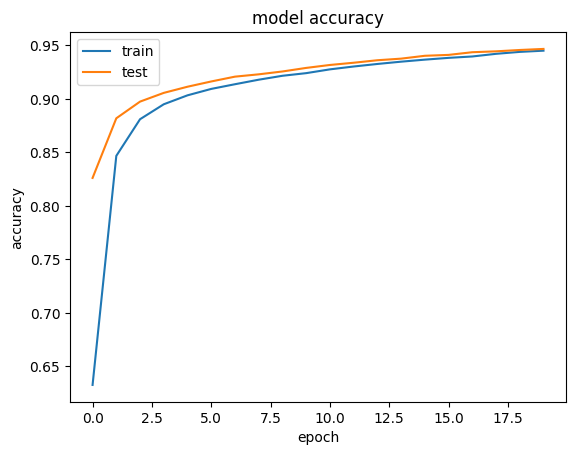

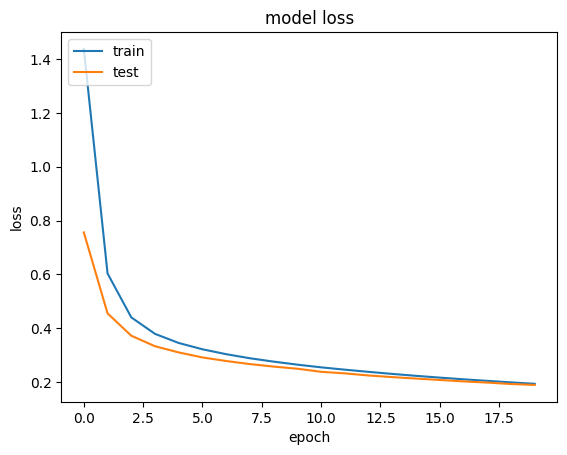

In [28]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()